In [1]:
import json 
import pandas as pd
from urllib.request import urlopen
from disCap import finmod as FM
from disCap import disCap
import matplotlib.pyplot as plt
import numpy as np
import pprint

'''
financialmodelingprep ask that the API key not be shared.  I keep mine in a json
file.  The API key is available and free for use provided by registration at 
the site, it is to not be shared or left in git. 
'''
#api_key = None
#api_key = "6163425f2c630fd89ae0c3b7a9fdbe52"

with open(r"C:\Users\dgspr\.ssh\finmod_api_key.json") as f:
  api_key = json.load(f)['api_key']

print(api_key)

6163425f2c630fd89ae0c3b7a9fdbe52


In [2]:
def create_plot(todays_df, stock_data_df, blue_point):
    
    todays_df = todays_df.merge(stock_data_df, how='left', on='symbol')
    todays_df['value'] =  todays_df['close'] * todays_df['shares'] 
    todays_df['gain'] =  todays_df['value']/todays_df['invested']
        
    total_invested, total_value = sum(todays_df.invested), sum(todays_df.value)
    todays_df = todays_df.merge( stock_description_df, on='symbol',how='left')
    todays_df['prc_value'] = 100* ( todays_df['value']/total_value )
    todays_df['prc_invested'] = 100 * (todays_df['invested']/total_value )
    todays_df['basis'] = todays_df['invested']/todays_df['shares']
    
    todays_df['rho60'] = todays_df['close']/todays_df['maxmed60']
    todays_df['rho120'] = todays_df['close']/todays_df['maxmed120']
    todays_df = todays_df.sort_values(by=['rho120'])
    
    fig1, ax1 = plt.subplots()
    todays_df = todays_df.sort_values(by=['gain'])
    
    green_point = 1
    red_point = 0.00
    # blue_point = max(todays_df.gain)
    
    print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green to blue shift'.\
      format(red_point, green_point, green_point, blue_point))
    
    label_ = list( map( disCap.mklab, todays_df.symbol, \
                   todays_df.invested, todays_df.value, todays_df.gain, todays_df.shares) )
    
    ax1.pie(todays_df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(todays_df.gain,red_point,green_point,blue_point) )
    
    plt.show()
    
    print('\n\nTotal Invested:\t\t\t{0:6.2f}\nTotal Value:\t\t\t{1:6.2f}\nAverage Gain %:\t\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))
    
    print('Median Gain:\t\t\t{0:6.2f}'.format(np.median(todays_df.gain)))

In [3]:
with open('data/new_investments.json') as f:
  investments = json.load(f)


with open('data/new_stock_description.json') as f:
  stock_description = json.load(f)

stock_description_df = FM.stockDescriptionAs_df(stock_description)
# investments_df, todays_df, dividend_df, dfn = FM.investmentsAs2_df(investments)
investments_df = FM.investmentsAs3_df(investments)
todays_df = FM.gettoday_df(investments_df)

dfn = investments_df.copy()
dfn.loc[dfn.comment == 'DividendRepurchase', 'invested'] = 0
dividend_df = FM.gettoday_df(dfn)

symbols = stock_description.keys()

stock_data_df = FM.portfolio_data(symbols, api_key)
stock_data_df['rho'] = stock_data_df['close']/stock_data_df['maxmed30']
stock_data_df = stock_data_df.sort_values(by=['rho'], ascending=False)


Pulling data from data/arc/20230804/ABNB.json for today: ABNB
Symbol: ABNB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/ALB.json for today: ALB
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/AMZN.json for today: AMZN
Symbol: AMZN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/ARCC.json for today: ARCC
Symbol: ARCC.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/ASML.json for today: ASML
Symbol: ASML.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/BHP.json for today: BHP
Symbol: BHP.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/BRK-B.json for today: BRK-B
Symbol: BRK-B.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20230804/KRP.json for today: KRP
Symbol: KRP.  Keys:

Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


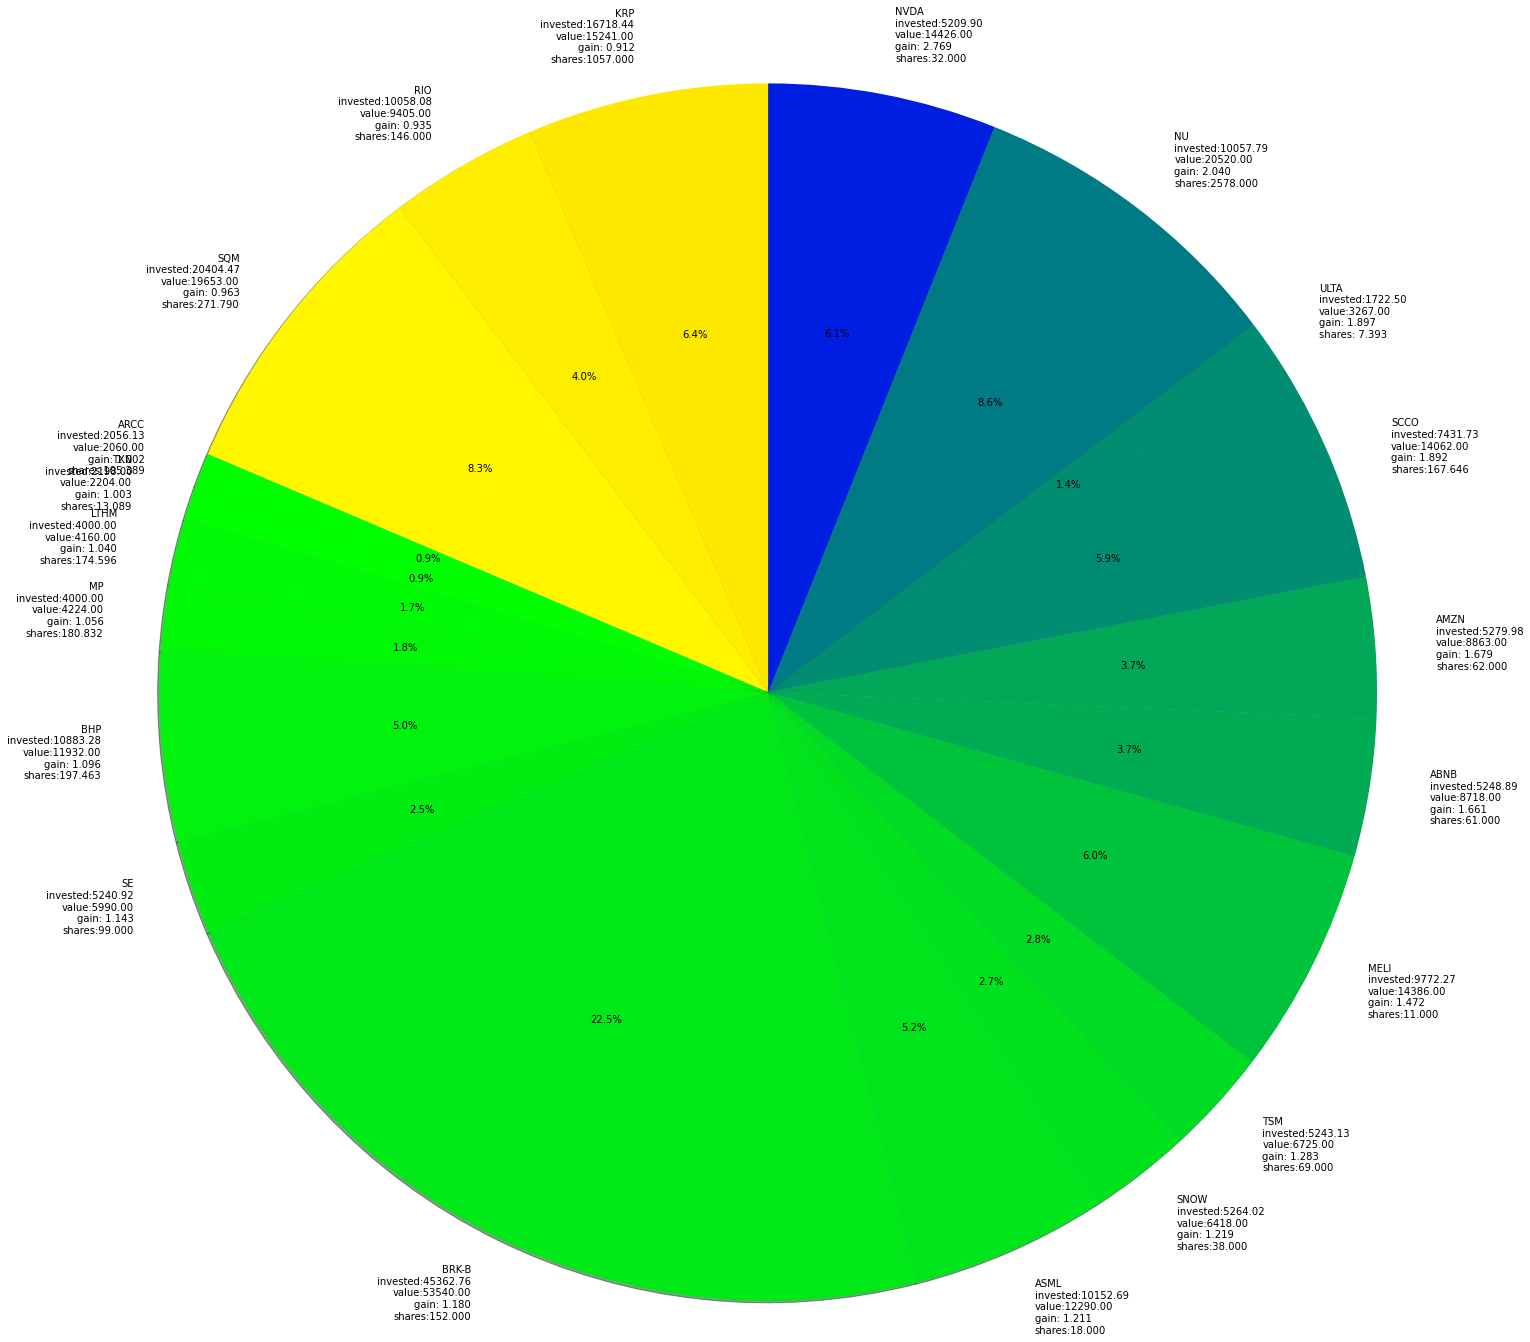



Total Invested:			186304.98
Total Value:			238094.42
Average Gain %:			  1.28
Median Gain:			  1.20


In [4]:
create_plot(todays_df, stock_data_df, 3.0)


Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


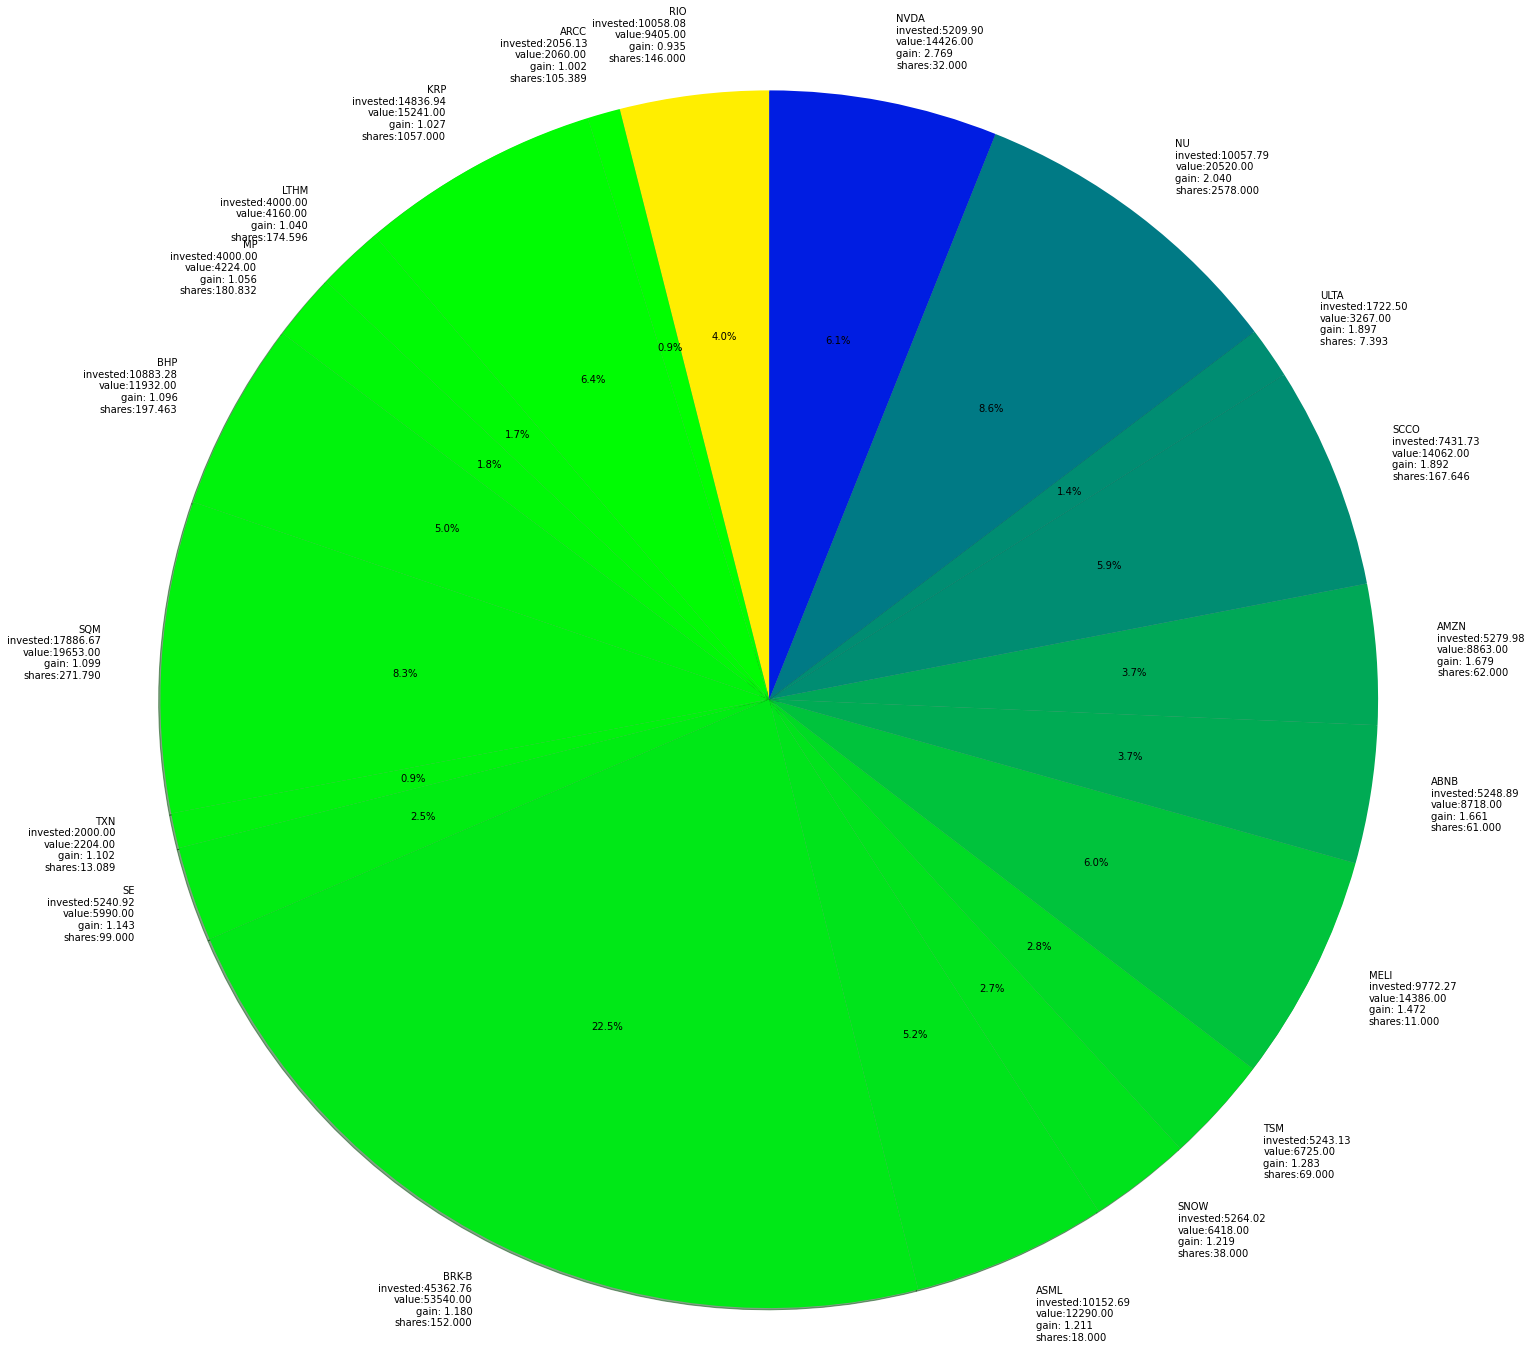



Total Invested:			181707.68
Total Value:			238094.42
Average Gain %:			  1.31
Median Gain:			  1.20


In [5]:
create_plot(dividend_df, stock_data_df, 3.0)

In [6]:
# only IRA
dfx = investments_df.copy()
dfx = dfx.loc[dfx.account!='StckPl']
todays_ira_df = FM.gettoday_df(dfx)

dfn = dfx.copy()
dfn.loc[dfn.comment == 'DividendRepurchase', 'invested'] = 0
dividend_ira_df = FM.gettoday_df(dfn)

Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


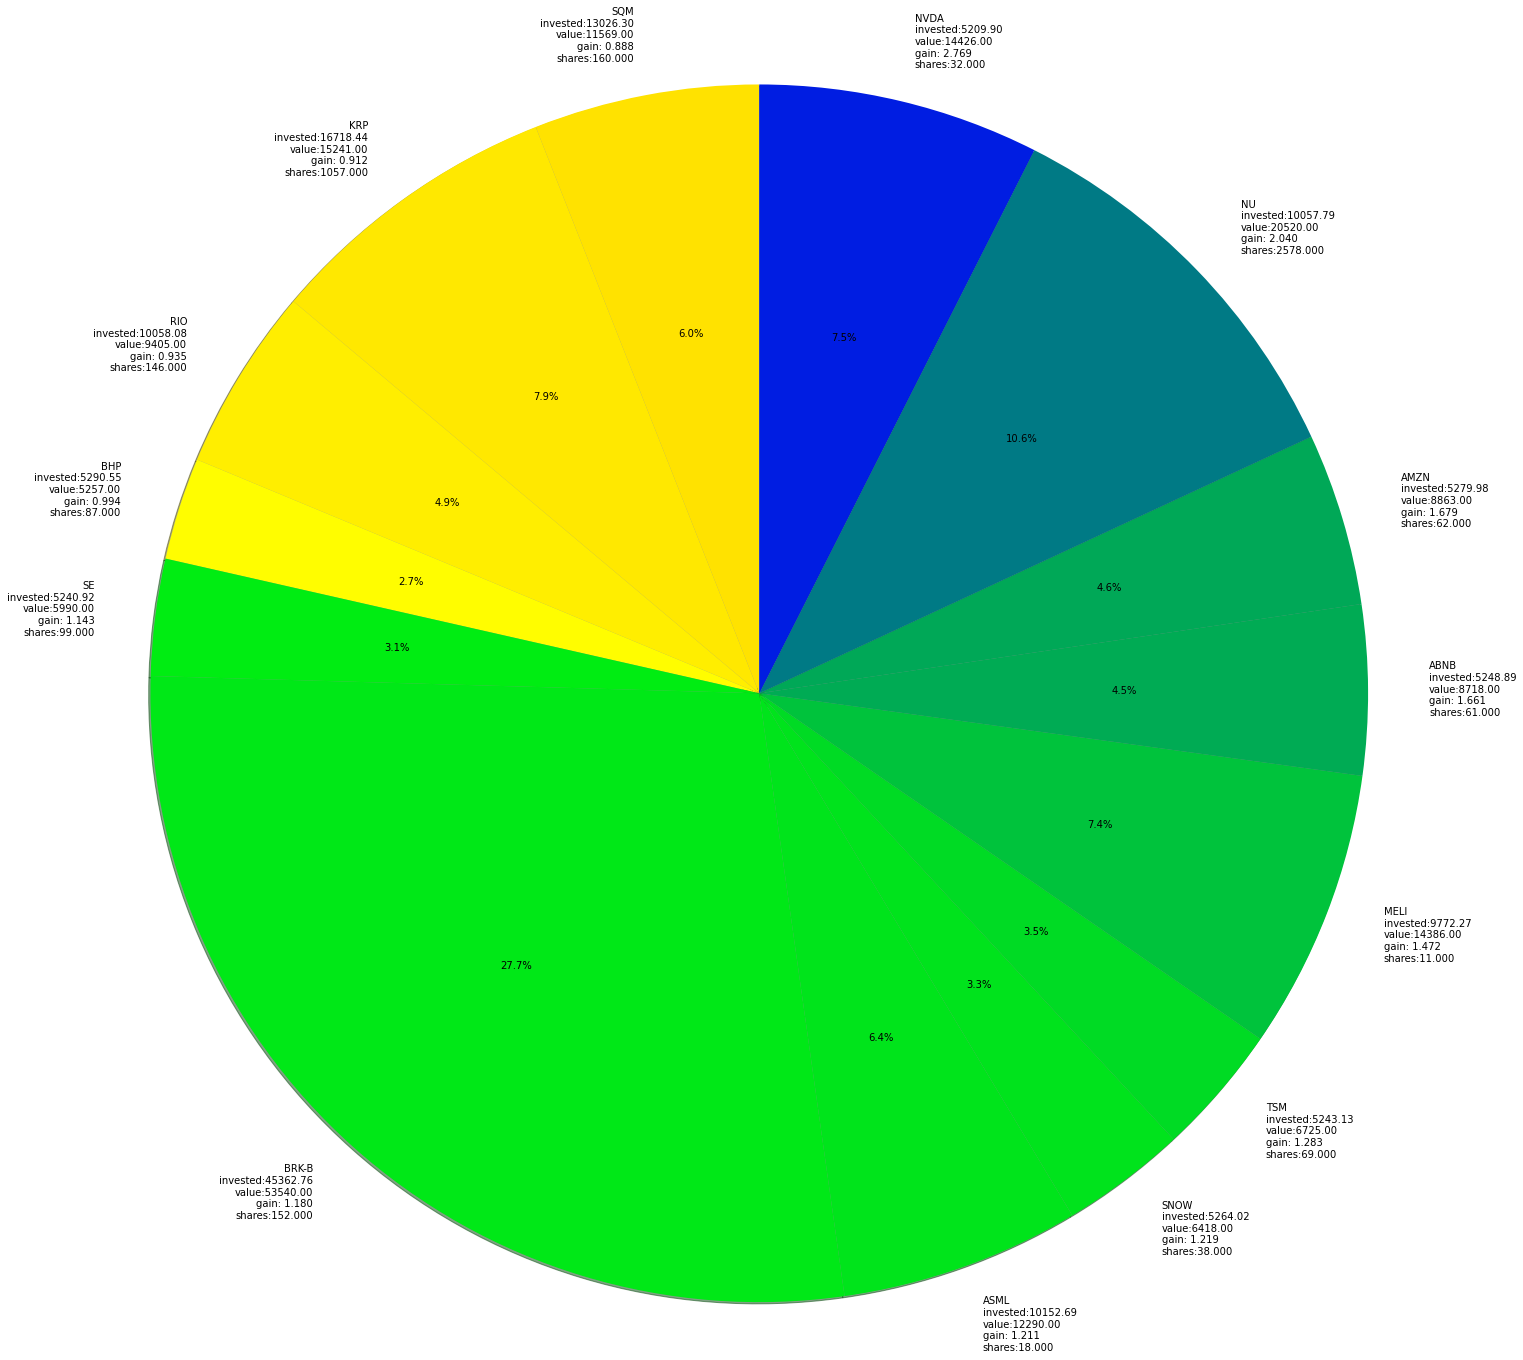



Total Invested:			151925.72
Total Value:			193355.94
Average Gain %:			  1.27
Median Gain:			  1.21


In [7]:
create_plot(todays_ira_df, stock_data_df, 3.0)

Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


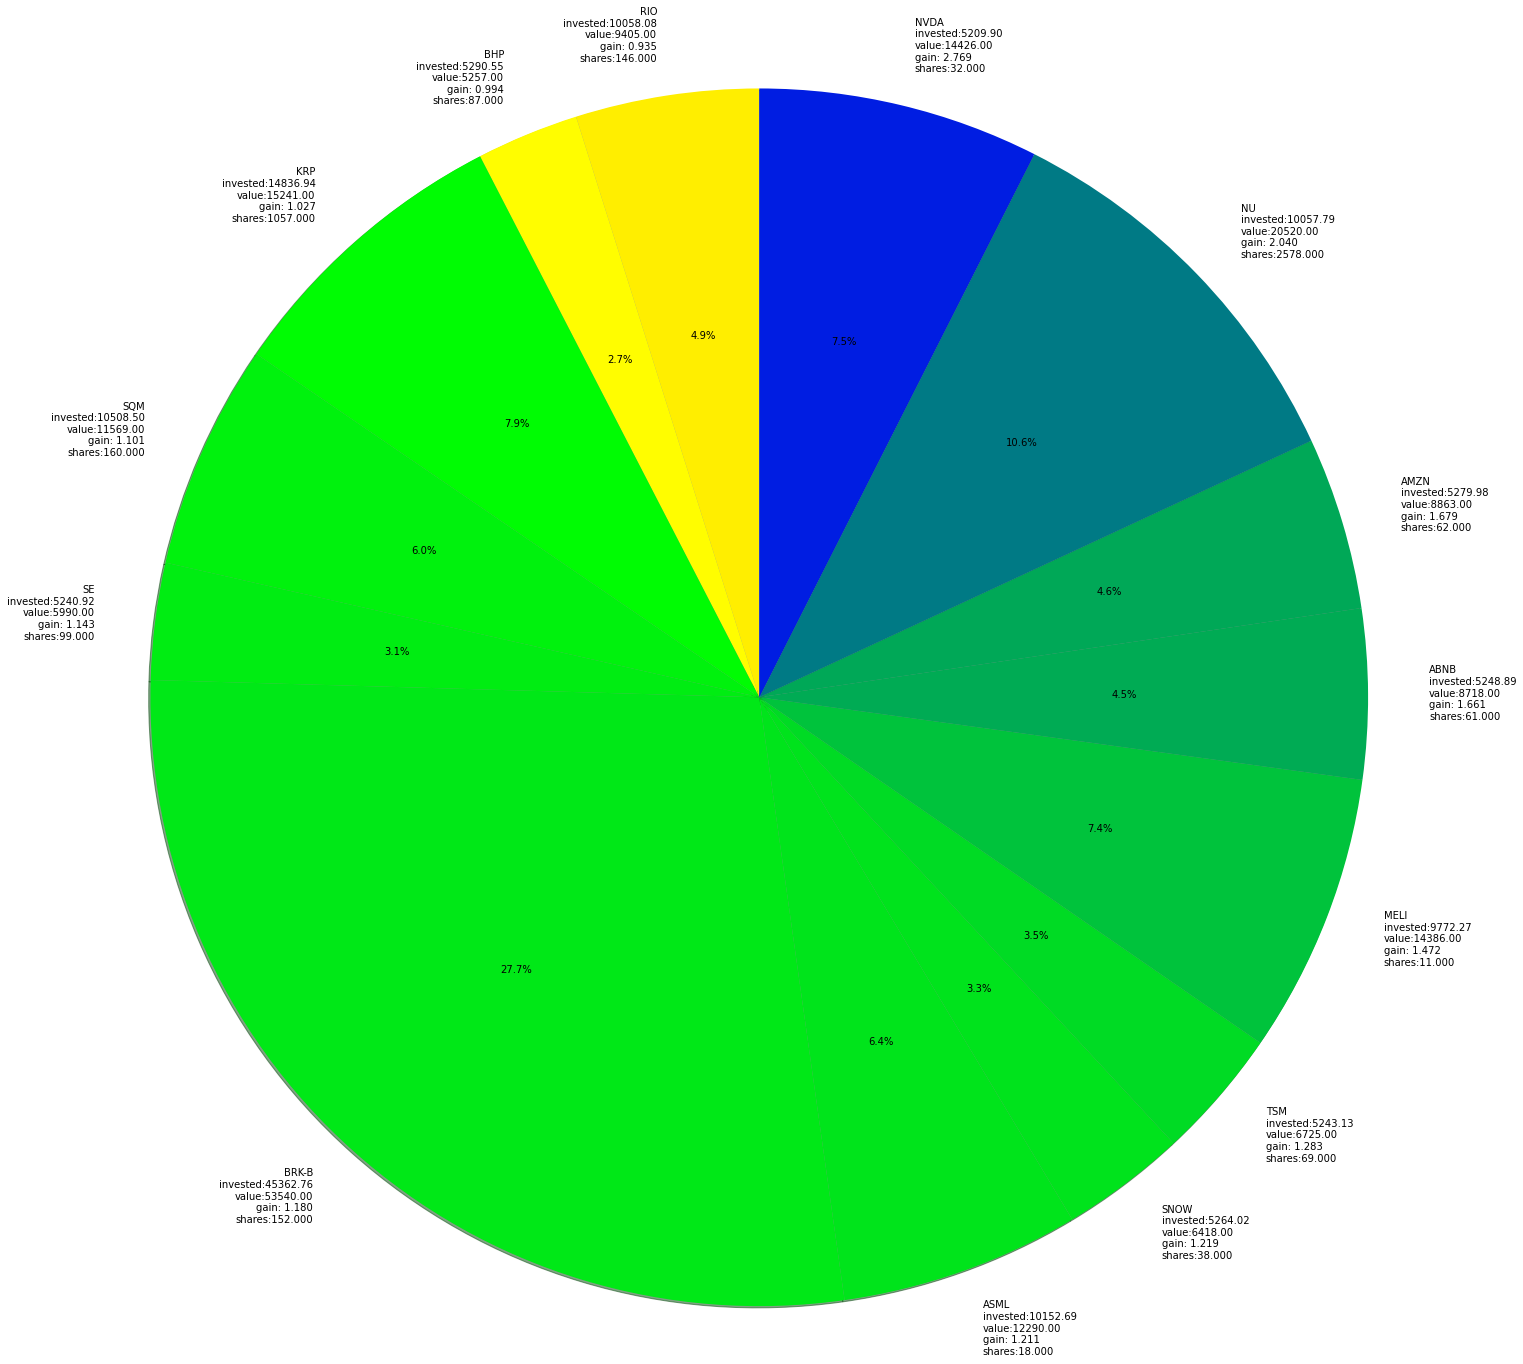



Total Invested:			147526.42
Total Value:			193355.94
Average Gain %:			  1.31
Median Gain:			  1.21


In [8]:
create_plot(dividend_ira_df, stock_data_df, 3.0)

In [9]:
# only stockpile
dfx = investments_df.copy()
dfx = dfx.loc[dfx.account=='StckPl']
todays_stckpl_df = FM.gettoday_df(dfx)

dfn = dfx.copy()
dfn.loc[dfn.comment == 'DividendRepurchase', 'invested'] = 0
dividend_stckpl_df = FM.gettoday_df(dfn)

Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


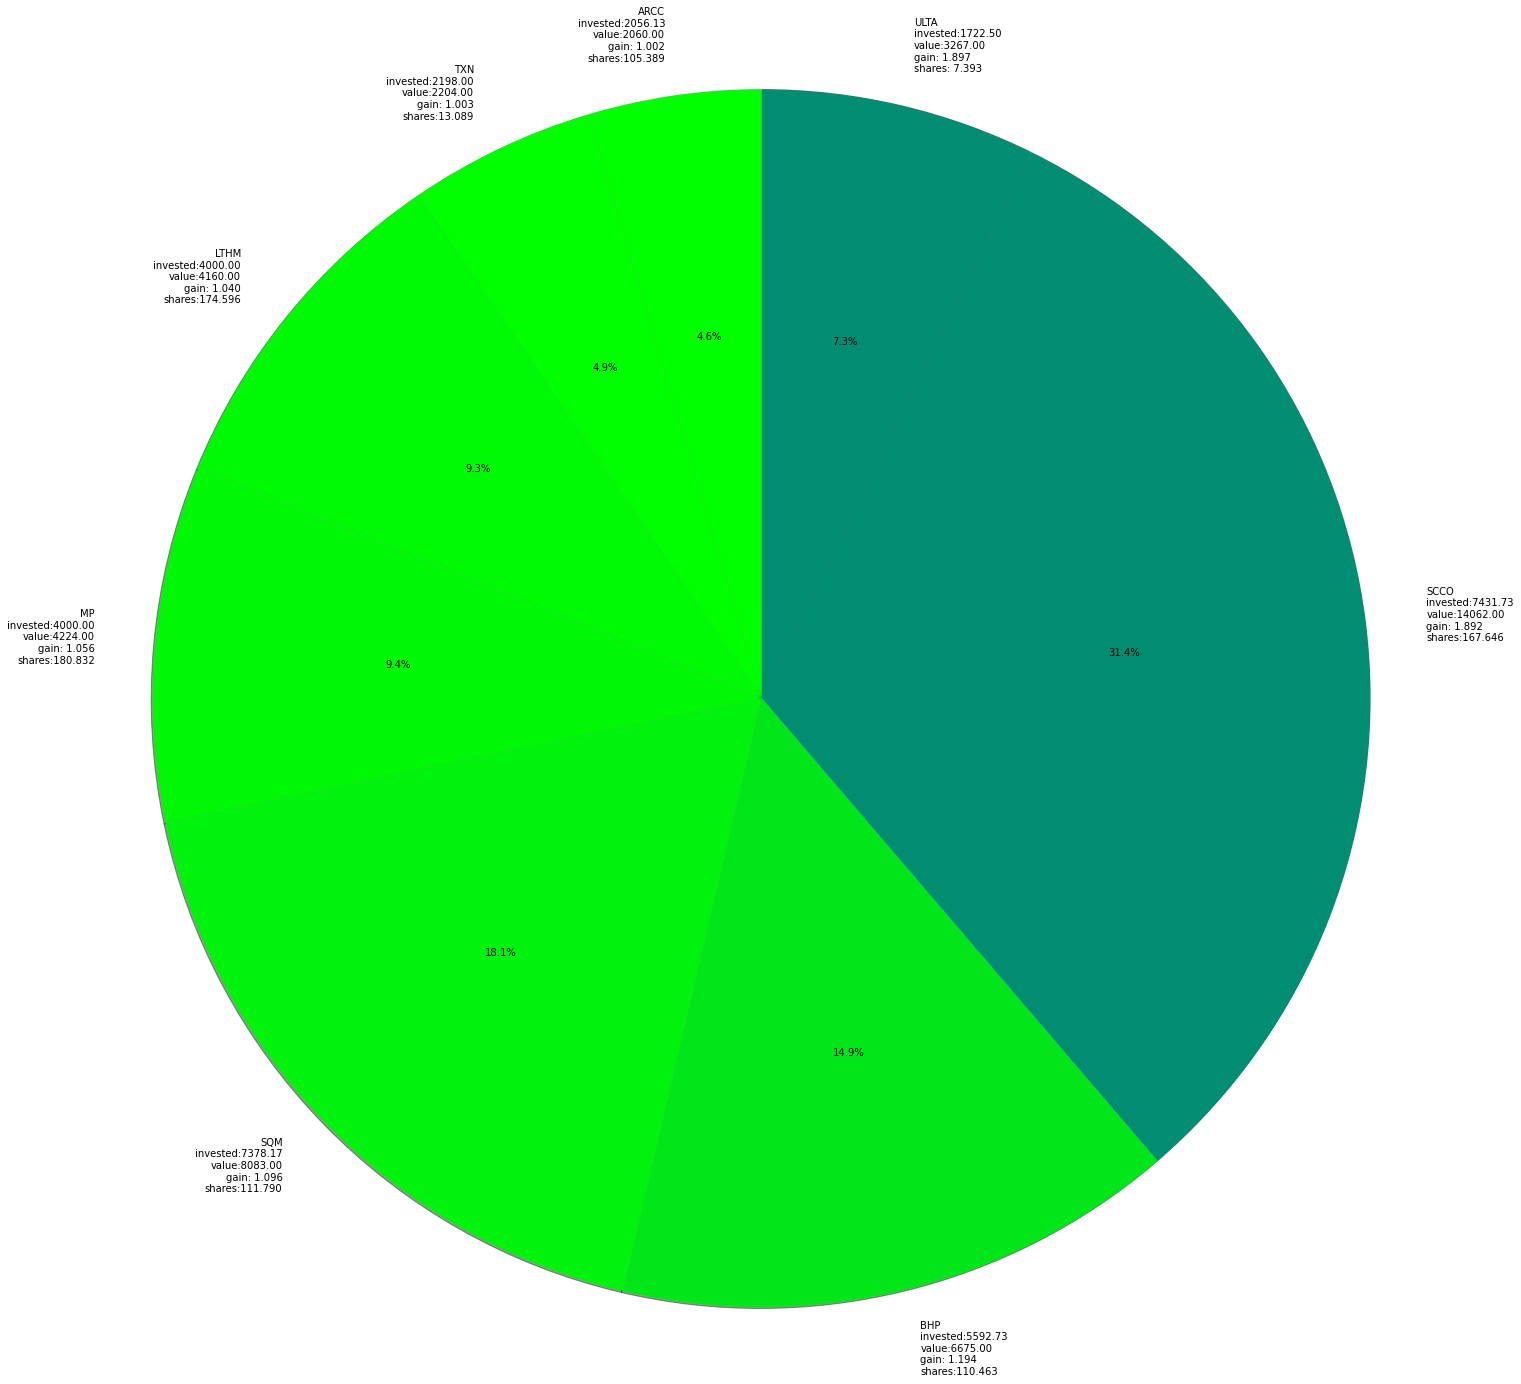



Total Invested:			34379.26
Total Value:			44738.48
Average Gain %:			  1.30
Median Gain:			  1.08


In [10]:
create_plot(todays_stckpl_df, stock_data_df, 3.0)

Red at gain = 0.0.
Changes linear to yellow at 1.
From 1 to 3.0 is green to blue shift


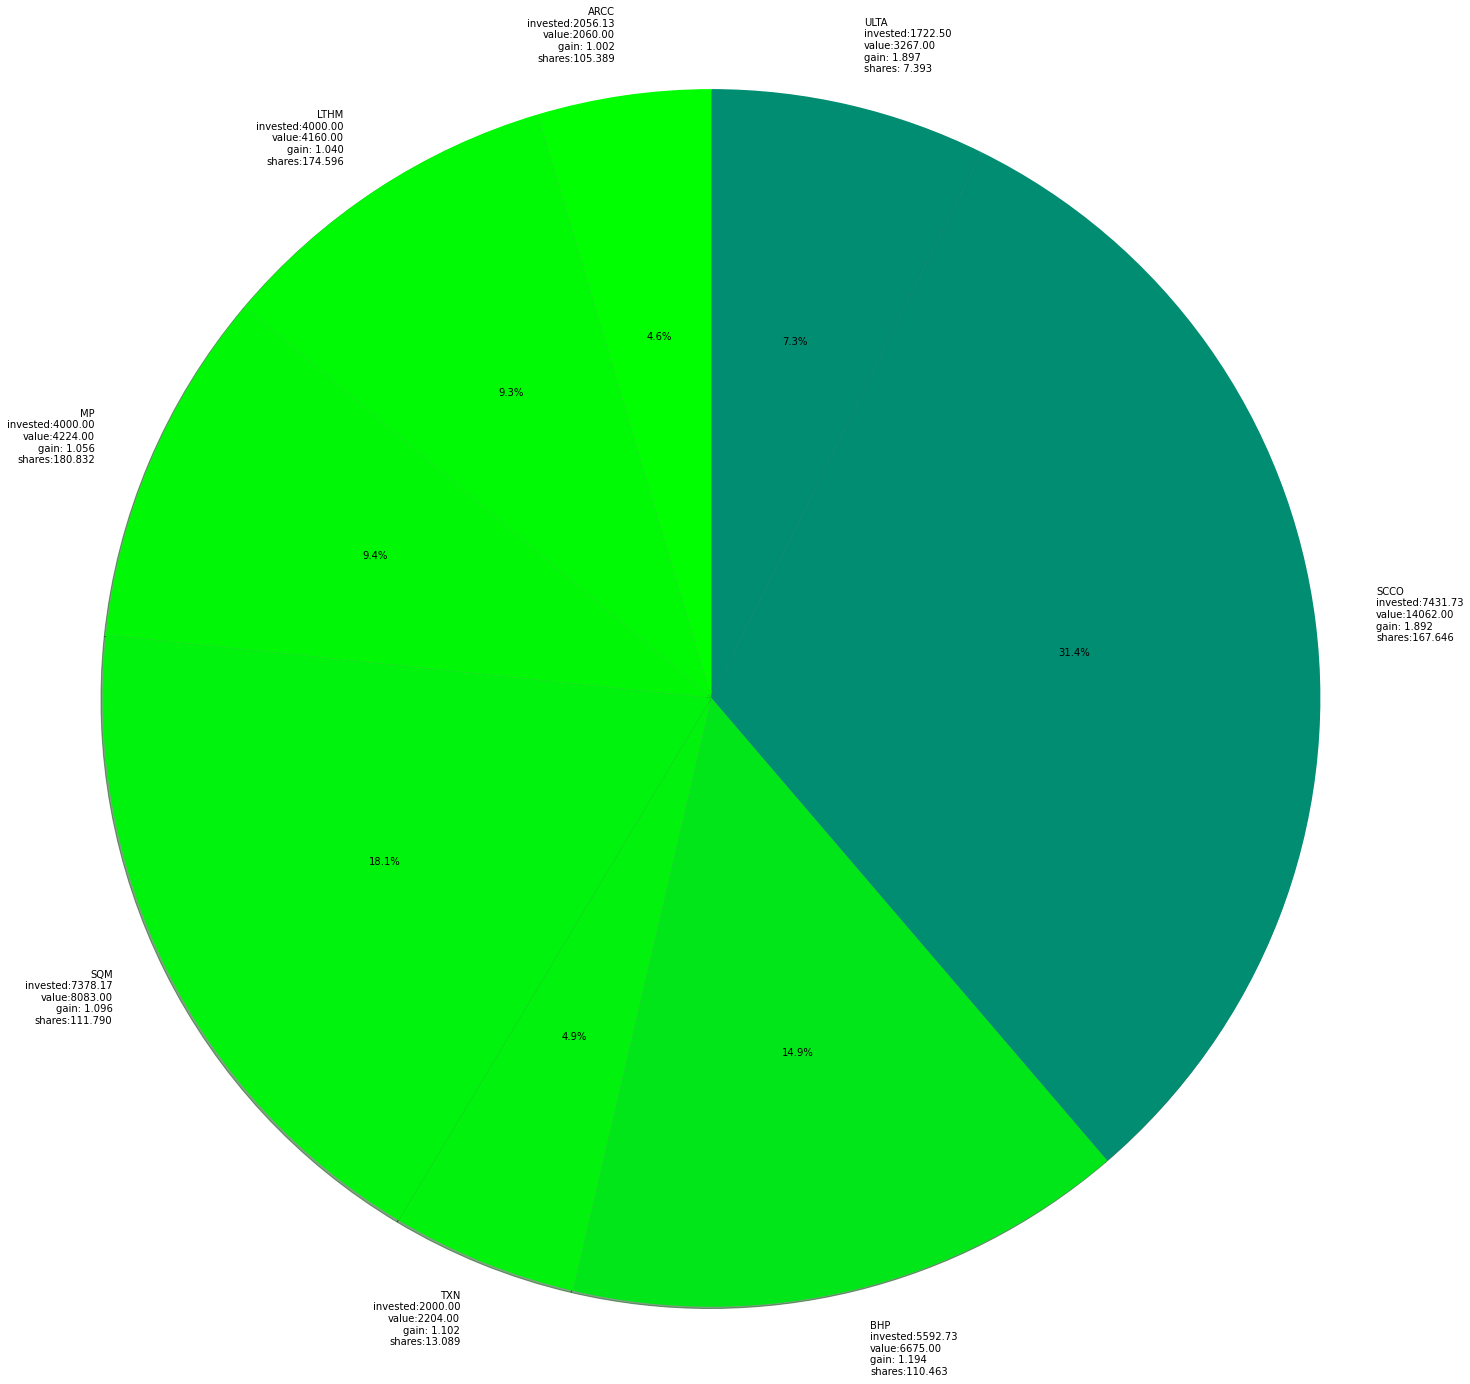



Total Invested:			34181.26
Total Value:			44738.48
Average Gain %:			  1.31
Median Gain:			  1.10


In [11]:
create_plot(dividend_stckpl_df, stock_data_df, 3.0)